# Underwater Image Restoration model 
**Description:** Underwater Image restoration model based on LightenNet model proposed by Chongyi Li et al


## Setup

In [1]:
import tensorflow as tf

import os
import math
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

from IPython.display import display

In [10]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape, concatenate
from tensorflow.keras.layers import BatchNormalization, RepeatVector, Permute, Activation
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.layers import MaxPooling2D, Input, Dense, Flatten

from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec

## Load dataset

In [3]:
data_dir = "C:/Users/path..."
img = os.path.join(data_dir, "img_path")
target = os.path.join(data_dir, "targetpath")

In [4]:
print(data_dir)
print(img)
print(target)

C:/Users\Administrator\Desktop\Dataset\UnderwaterSet5
C:/Users\Administrator\Desktop\Dataset\UnderwaterSet5\LR
C:/Users\Administrator\Desktop\Dataset\UnderwaterSet5\HR


In [5]:
crop_size = 300
upscale_factor = 3
input_size = crop_size // upscale_factor

In [6]:
def fetch_images(X, Y, size):
    x_images = []
    y_images = []
    
    for file in (os.listdir(X)):
        image = Image.open(X+'/'+file)
        x_image = image.resize(size)
        x_image = np.array(x_image)
        x_images.append(x_image)
        
    for file in (os.listdir(Y)):
        image = Image.open(Y+'/'+file)
        y_image = image.resize(size)
        y_image = np.array(y_image)
        y_images.append(y_image)
        
    x_images = np.array(x_images)
    y_images = np.array(y_images)
    x_images = x_images / 255
    y_images = y_images / 255
    
    return x_images, y_images

ximages, yimages = fetch_images(img, target, (input_size,input_size))

## Build a model

In [6]:

def get_model(channels=3):
    
    inputs = keras.Input(shape=(None, None, channels))
   
    c1 = Conv2D(32,(6,6),padding='SAME',activation='relu')(inputs)

    c2 = Conv2DTranspose(16,(3,3),padding='SAME',activation='relu')(c1)
    
    c3 = Conv2DTranspose(8,(3,3),padding='SAME',activation='relu')(c2)
    
    outputs = Conv2DTranspose(3,(3,3),padding='SAME', activation='relu')(c3)
    
    return keras.Model(inputs, outputs)


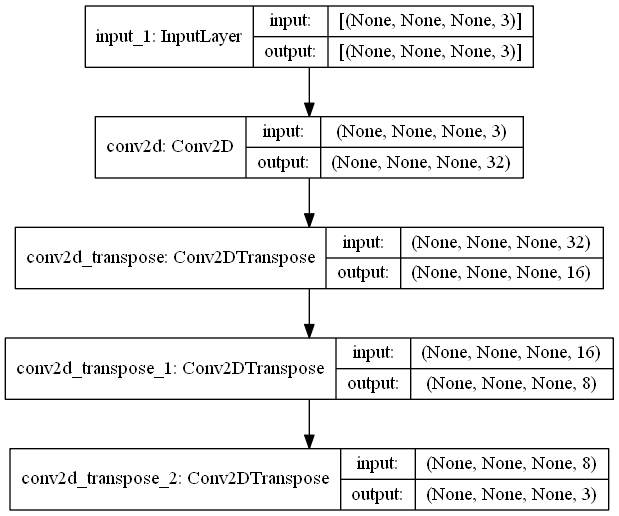

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='LLDNN3_model_.png',show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='LLDNN3_model_.png')

## Train the model

In [9]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="LLDNN3_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')


model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 50

history = model.fit(
    ximages, yimages, validation_split=0.2, epochs=epochs, batch_size=4, callbacks = [checkpoint,reduce_lr]
)

# The model weights (that are considered the best) are loaded into the model.
# model.load_weights(filepath)

Epoch 1/50
183/183 [==============================] - 5s 9ms/step - loss: 0.0324 - accuracy: 0.5022 - val_loss: 0.0049 - val_accuracy: 0.4467

Epoch 00001: val_loss improved from inf to 0.00490, saving model to LLDNN3_weights.hdf5
Epoch 2/50
183/183 [==============================] - 2s 8ms/step - loss: 0.0204 - accuracy: 0.5427 - val_loss: 0.0046 - val_accuracy: 0.5871

Epoch 00002: val_loss improved from 0.00490 to 0.00456, saving model to LLDNN3_weights.hdf5
Epoch 3/50
183/183 [==============================] - 2s 8ms/step - loss: 0.0183 - accuracy: 0.5546 - val_loss: 0.0032 - val_accuracy: 0.4835

Epoch 00003: val_loss improved from 0.00456 to 0.00321, saving model to LLDNN3_weights.hdf5
Epoch 4/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0177 - accuracy: 0.5536 - val_loss: 0.0039 - val_accuracy: 0.6221

Epoch 00004: val_loss did not improve from 0.00321
Epoch 5/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0176 - accuracy: 0.5516 - val


Epoch 00039: val_loss did not improve from 0.00243
Epoch 40/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0140 - accuracy: 0.6122 - val_loss: 0.0028 - val_accuracy: 0.6322

Epoch 00040: val_loss did not improve from 0.00243
Epoch 41/50
183/183 [==============================] - 2s 10ms/step - loss: 0.0140 - accuracy: 0.6122 - val_loss: 0.0028 - val_accuracy: 0.6324

Epoch 00041: val_loss did not improve from 0.00243
Epoch 42/50
183/183 [==============================] - 2s 11ms/step - loss: 0.0140 - accuracy: 0.6122 - val_loss: 0.0028 - val_accuracy: 0.6325

Epoch 00042: val_loss did not improve from 0.00243
Epoch 43/50
183/183 [==============================] - 2s 10ms/step - loss: 0.0140 - accuracy: 0.6122 - val_loss: 0.0028 - val_accuracy: 0.6324

Epoch 00043: val_loss did not improve from 0.00243
Epoch 44/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0140 - accuracy: 0.6122 - val_loss: 0.0028 - val_accuracy: 0.6325

Epoch 00044: val_loss

## Run model prediction and plot the results

Let's compute the reconstructed version of a few images and save the results.

In [15]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

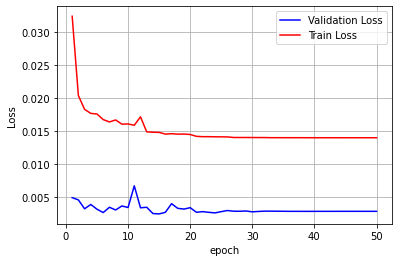

In [16]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,50+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [11]:
def load_testimage(name, size):
  x_images = []
  for file in (os.listdir(name)):
      image = Image.open(name + "/" + file)
      image = image.resize(size)
      image = np.array(image,dtype=float)
      image = image / 255
      image = np.array([image])
      x_images.append(image) 
  return x_images
testimages = load_testimage(img,(300,300))

In [12]:
def load_groundtruth(name, size):
  y_images = []
  for file in (os.listdir(name)):
      image = Image.open(name + "/" + file)
      image = image.resize(size)
      image = np.array(image,dtype=float)
      image = image / 255
      image = np.array([image])
      y_images.append(image) 
  return y_images
groundtruth = load_groundtruth(target,(300,300))

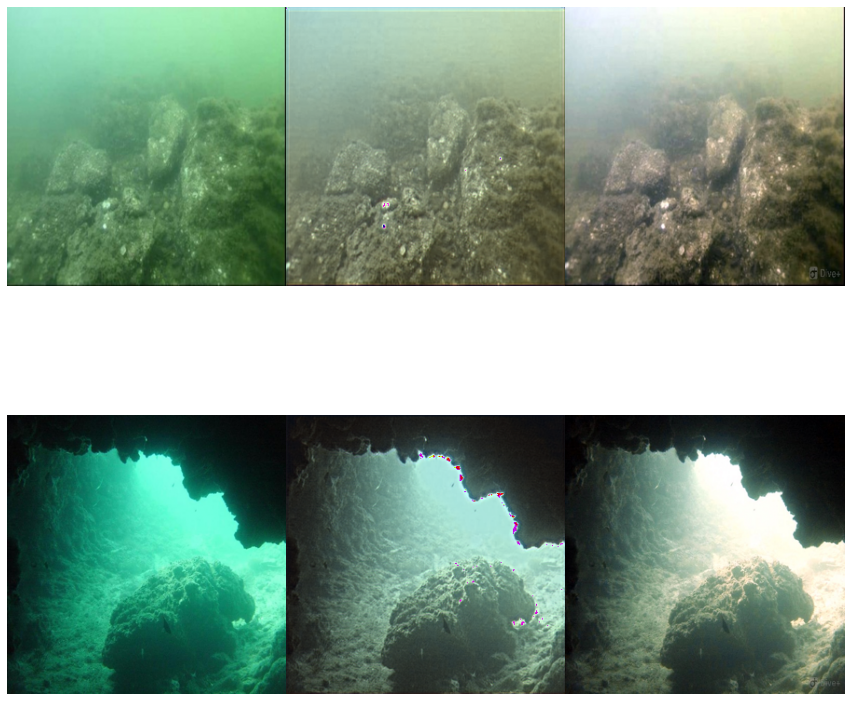

In [13]:
model.load_weights('LLDNN3_weights.hdf5')

f, ax = plt.subplots(2,3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},squeeze=True)
plt.subplots_adjust(wspace=None, hspace=None)
f.set_figheight(15)
f.set_figwidth(15)
c = 31
j = 0
for i in range(2):  
    prediction = model.predict(testimages[c])
    prediction = prediction[0] * 255
    prediction = prediction.astype(np.uint8)
    prediction = Image.fromarray(prediction)
    
    ax[i][j].axis("off")
    ax[i][j].imshow(testimages[c].reshape(300,300,3))
    ax[i][j+1].axis("off")
    ax[i][j+1].imshow(prediction)
    ax[i][j+2].axis("off")
    ax[i][j+2].imshow(groundtruth[c].reshape(300,300,3))
    c = c + 1

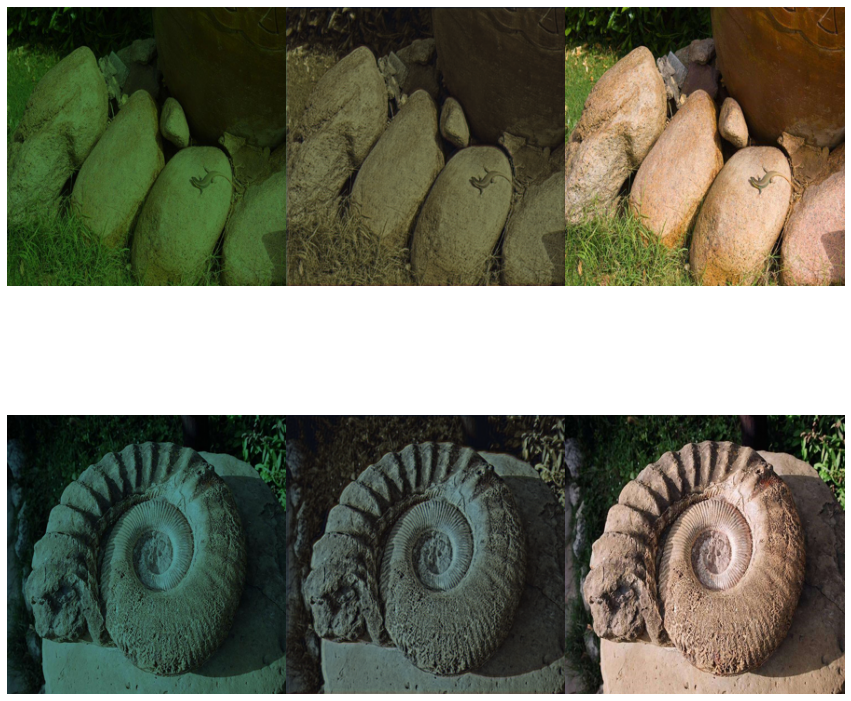

In [14]:
f, ax = plt.subplots(2,3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},squeeze=True)
plt.subplots_adjust(wspace=None, hspace=None)
f.set_figheight(15)
f.set_figwidth(15)
c = 12
j = 0
for i in range(2):  
    prediction = model.predict(testimages[c])
    prediction = prediction[0] * 255
    prediction = prediction.astype(np.uint8)
    prediction = Image.fromarray(prediction)
    
    ax[i][j].axis("off")
    ax[i][j].imshow(testimages[c].reshape(300,300,3))
    ax[i][j+1].axis("off")
    ax[i][j+1].imshow(prediction)
    ax[i][j+2].axis("off")
    ax[i][j+2].imshow(groundtruth[c].reshape(300,300,3))
    c = c + 1

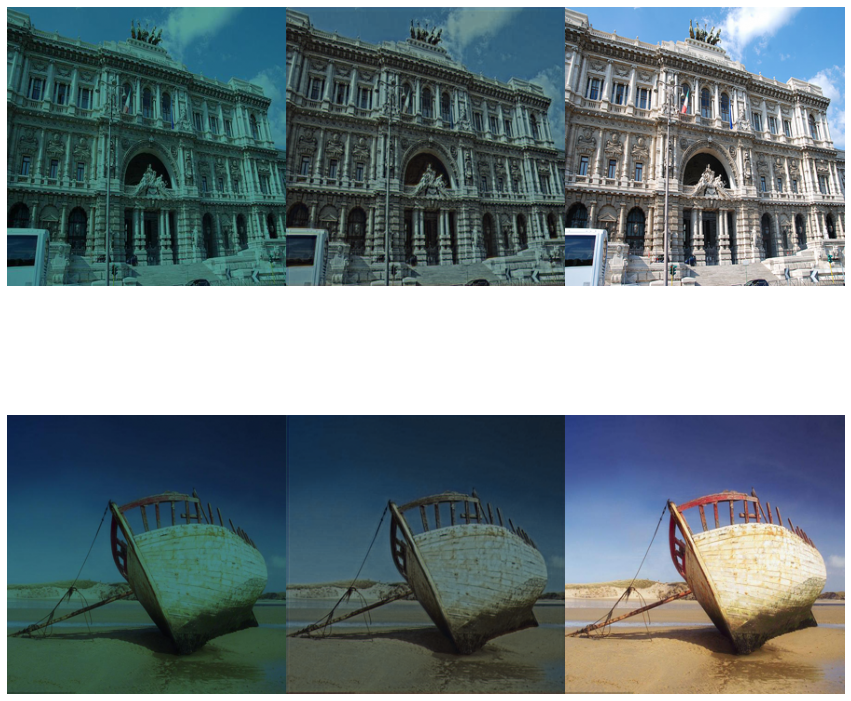

In [15]:
f, ax = plt.subplots(2,3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},squeeze=True)
plt.subplots_adjust(wspace=None, hspace=None)
f.set_figheight(15)
f.set_figwidth(15)
c = 1
j = 0
for i in range(2):  
    prediction = model.predict(testimages[c])
    prediction = prediction[0] * 255
    prediction = prediction.astype(np.uint8)
    prediction = Image.fromarray(prediction)
    
    ax[i][j].axis("off")
    ax[i][j].imshow(testimages[c].reshape(300,300,3))
    ax[i][j+1].axis("off")
    ax[i][j+1].imshow(prediction)
    ax[i][j+2].axis("off")
    ax[i][j+2].imshow(groundtruth[c].reshape(300,300,3))
    c = c + 1

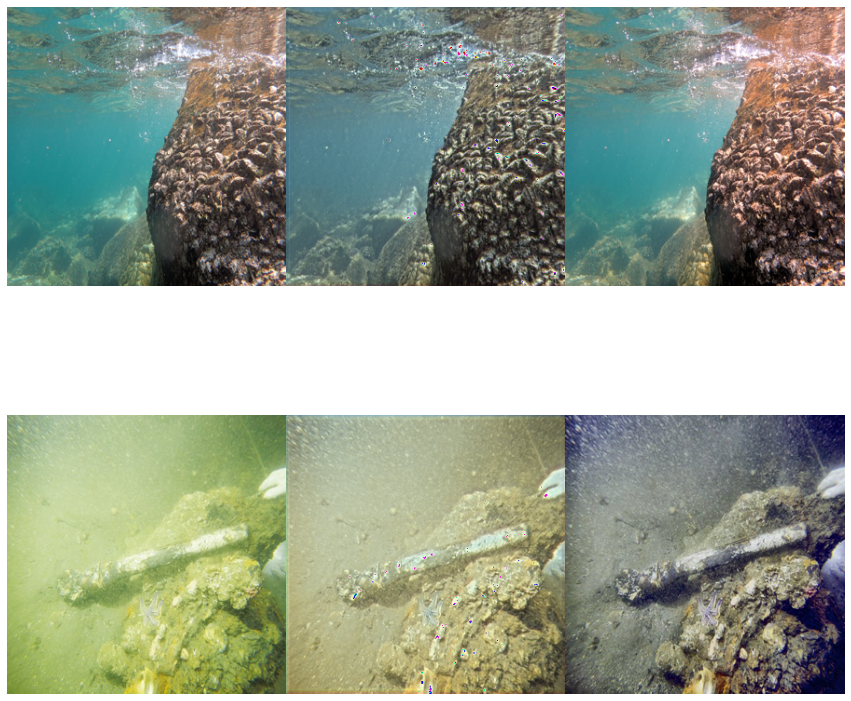

In [23]:
f, ax = plt.subplots(2,3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},squeeze=True)
plt.subplots_adjust(wspace=None, hspace=None)
f.set_figheight(15)
f.set_figwidth(15)
c = 130
j = 0
for i in range(2):  
    prediction = model.predict(testimages[c])
    prediction = prediction[0] * 255
    prediction = prediction.astype(np.uint8)
    prediction = Image.fromarray(prediction)
    
    ax[i][j].axis("off")
    ax[i][j].imshow(testimages[c].reshape(300,300,3))
    ax[i][j+1].axis("off")
    ax[i][j+1].imshow(prediction)
    ax[i][j+2].axis("off")
    ax[i][j+2].imshow(groundtruth[c].reshape(300,300,3))
    c = c + 1

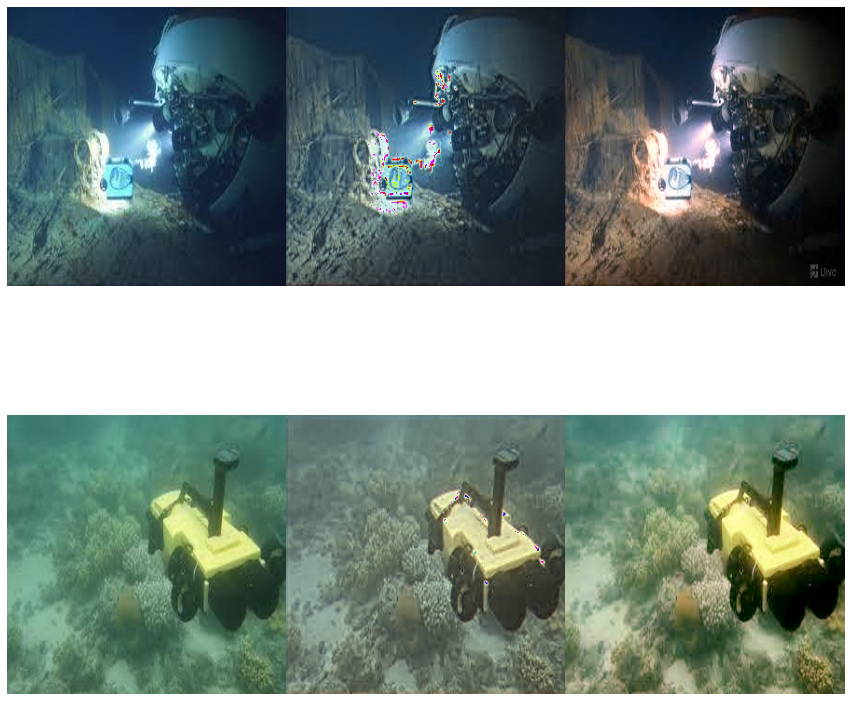

In [24]:
f, ax = plt.subplots(2,3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},squeeze=True)
plt.subplots_adjust(wspace=None, hspace=None)
f.set_figheight(15)
f.set_figwidth(15)
c = 230
j = 0
for i in range(2):  
    prediction = model.predict(testimages[c])
    prediction = prediction[0] * 255
    prediction = prediction.astype(np.uint8)
    prediction = Image.fromarray(prediction)
    
    ax[i][j].axis("off")
    ax[i][j].imshow(testimages[c].reshape(300,300,3))
    ax[i][j+1].axis("off")
    ax[i][j+1].imshow(prediction)
    ax[i][j+2].axis("off")
    ax[i][j+2].imshow(groundtruth[c].reshape(300,300,3))
    c = c + 1

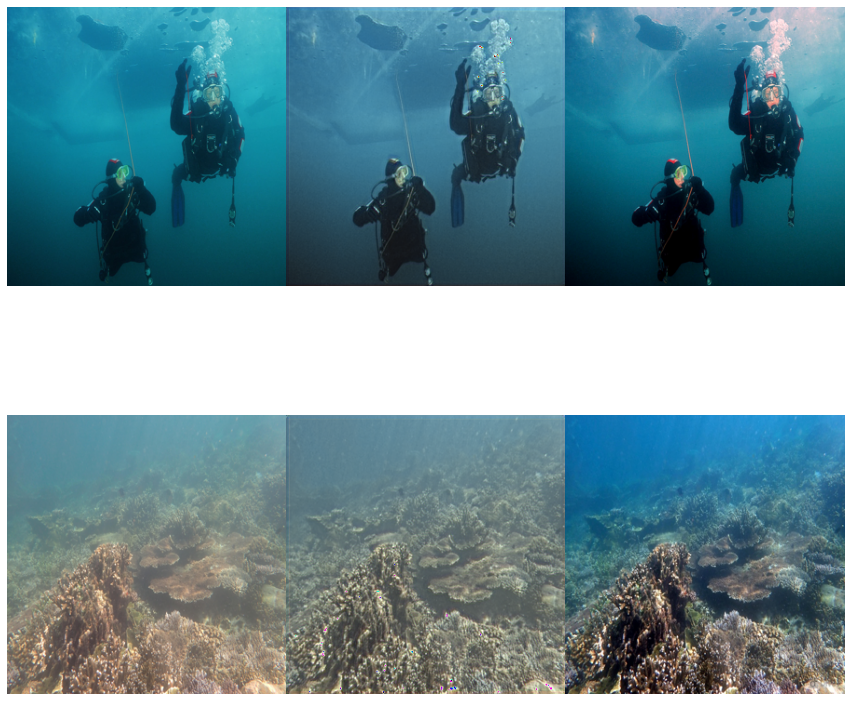

In [25]:
f, ax = plt.subplots(2,3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},squeeze=True)
plt.subplots_adjust(wspace=None, hspace=None)
f.set_figheight(15)
f.set_figwidth(15)
c = 150
j = 0
for i in range(2):  
    prediction = model.predict(testimages[c])
    prediction = prediction[0] * 255
    prediction = prediction.astype(np.uint8)
    prediction = Image.fromarray(prediction)
    
    ax[i][j].axis("off")
    ax[i][j].imshow(testimages[c].reshape(300,300,3))
    ax[i][j+1].axis("off")
    ax[i][j+1].imshow(prediction)
    ax[i][j+2].axis("off")
    ax[i][j+2].imshow(groundtruth[c].reshape(300,300,3))
    c = c + 1